# Task 1
## 2

Next, take the two well-known datasets: Fashion MNIST (introduced in Ch 10, p.  298) and CIFAR-10.The first dataset contains 2D (grayscale) images of size 28x28, split into 10 categories; 60,000 images for training  and  10,000  for  testing,  while  the  latter  contains  32x32x3  RGB  images  (50,000/10,000train/test). Apply two reference networks on the fashion MNIST dataset

### a
A multi-layer perceptron

In [28]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Loading the data
fashion_mnist = keras.datasets.fashion_mnist

In [30]:
# Creating the train and test sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape  # This is usefull to know for the input_shape of the weight matrix of the model as 
                    # it depends on the number of inputs

# Normalising the pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Creating a validation set of 10%
validation_size = int(0.1 * len(X_train_full))

X_valid, X_train = X_train_full[:validation_size], X_train_full[validation_size:]
y_valid, y_train = y_train_full[:validation_size], y_train_full[validation_size:]


In [31]:
# Setting the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Now lets build a basic network <br>
MLP with 2 hidden layers

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28])) # we know the input shape from earlier
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary() # overview of model and its layers

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# sparse_categorical_crossentropy: we have sparse labels (0 to 9) and the are exclusive
# sgd: =keras.optimiz ers.SGD(lr=???)
# accuracy: we want to compare the accuracies of different models

In [35]:
# save weights to reset and compare models
initial_weights = model.get_weights()

Now train the model on the data

In [36]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid)) 

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6941 - loss: 0.9660 - val_accuracy: 0.8042 - val_loss: 0.5498
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8267 - loss: 0.5056 - val_accuracy: 0.8328 - val_loss: 0.4693
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8414 - loss: 0.4546 - val_accuracy: 0.8493 - val_loss: 0.4384
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8489 - loss: 0.4264 - val_accuracy: 0.8468 - val_loss: 0.4396
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8566 - loss: 0.4057 - val_accuracy: 0.8635 - val_loss: 0.3948
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8646 - loss: 0.3867 - val_accuracy: 0.8677 - val_loss: 0.3843
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8683 - loss: 0.3726 - val_accuracy: 0.8663 - val_loss: 0.3774
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8710 - loss: 0.3609 - 

Plotting the accuracy and loss per epoch

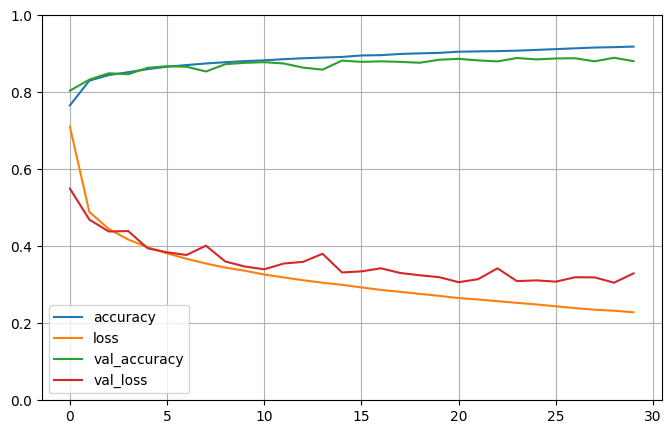

In [37]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Loss and accuracy on the test set:

In [38]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3585616648197174
Test accuracy: 0.8741000294685364


------------------------------------------------------
Now we'll try to get better results by changing parameters and comparing the accuracy and loss to the basic model <br>

1. Changing the model layers <br>
- Increasing the model complexity by adding more layers

In [45]:
model_im = keras.models.Sequential()
model_im.add(keras.layers.Flatten(input_shape = [28, 28])) # we know the input shape from earlier
model_im.add(keras.layers.Dense(300, activation="relu"))
model_im.add(keras.layers.Dense(200, activation="relu"))
model_im.add(keras.layers.Dense(100, activation="relu"))
model_im.add(keras.layers.Dense(10, activation="softmax"))

model_im.summary()

C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,810 (1.21 MB)

 Trainable params: 316,810 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model_im.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [47]:
history = model_im.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid)) 

score_im = model_im.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_im[0])
print('Test accuracy:', score_im[1])

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6487 - loss: 1.0701 - val_accuracy: 0.8190 - val_loss: 0.5327
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8262 - loss: 0.5026 - val_accuracy: 0.8438 - val_loss: 0.4529
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8428 - loss: 0.4414 - val_accuracy: 0.8620 - val_loss: 0.4049
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8541 - loss: 0.4114 - val_accuracy: 0.8570 - val_loss: 0.4060
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8648 - loss: 0.3834 - val_accuracy: 0.8485 - val_loss: 0.4108
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8674 - loss: 0.3685 - val_accuracy: 0.8562 - val_loss: 0.3965
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8750 - loss: 0.3488 - val_accuracy: 0.8668 - val_loss: 0.3639
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8803 - loss: 0.3358 - 

This increased the accuracy and decreased the loss!

- Using Batch Normalisation <br>
This normalises the inputs to each layer. This increases the learning rate

In [48]:
model_im = keras.models.Sequential()
model_im.add(keras.layers.Flatten(input_shape = [28, 28])) # we know the input shape from earlier

model_im.add(keras.layers.Dense(300))
model_im.add(keras.layers.BatchNormalization())
model_im.add(keras.layers.Activation("relu"))

model_im.add(keras.layers.Dense(100))
model_im.add(keras.layers.BatchNormalization())
model_im.add(keras.layers.Activation("relu"))

model_im.add(keras.layers.Dense(10, activation="softmax"))

model_im.summary()

C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,210 (1.02 MB)

 Trainable params: 267,410 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

In [50]:
model_im.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model_im.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid)) 

score_im = model_im.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_im[0])
print('Test accuracy:', score_im[1])

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7498 - loss: 0.7626 - val_accuracy: 0.8480 - val_loss: 0.4308
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8535 - loss: 0.4250 - val_accuracy: 0.8512 - val_loss: 0.4020
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8707 - loss: 0.3694 - val_accuracy: 0.8753 - val_loss: 0.3525
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8774 - loss: 0.3424 - val_accuracy: 0.8732 - val_loss: 0.3496
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8861 - loss: 0.3188 - val_accuracy: 0.8780 - val_loss: 0.3308
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8910 - loss: 0.3018 - val_accuracy: 0.8758 - val_loss: 0.3270
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8967 - loss: 0.2869 - val_accuracy: 0.8790 - val_loss: 0.3390
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9037 - loss: 0.2680 - 

This slightly increased the accuracy but the loss increased. This might therefore not be a good adjustment.

- Adding a dropout layer <br>
This prevents overfitting of the model

In [51]:
model_im = keras.models.Sequential()
model_im.add(keras.layers.Flatten(input_shape = [28, 28])) # we know the input shape from earlier
model_im.add(keras.layers.Dense(300, activation="relu"))
model_im.add(keras.layers.Dropout(0.5))

model_im.add(keras.layers.Dense(100, activation="relu"))
model_im.add(keras.layers.Dropout(0.5))

model_im.add(keras.layers.Dense(10, activation="softmax"))

model_im.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model_im.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model_im.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid)) 

score_im = model_im.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_im[0])
print('Test accuracy:', score_im[1])

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4865 - loss: 1.4486 - val_accuracy: 0.7893 - val_loss: 0.6280
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7305 - loss: 0.7574 - val_accuracy: 0.8222 - val_loss: 0.5216
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7730 - loss: 0.6474 - val_accuracy: 0.8332 - val_loss: 0.4721
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7965 - loss: 0.5830 - val_accuracy: 0.8435 - val_loss: 0.4434
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8048 - loss: 0.5557 - val_accuracy: 0.8502 - val_loss: 0.4257
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8193 - loss: 0.5235 - val_accuracy: 0.8588 - val_loss: 0.4121
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8226 - loss: 0.5097 - val_accuracy: 0.8583 - val_loss: 0.4016
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8302 - loss: 0.4885 - 

This gives slightly better results

- Changing the activation function <br>
As ReLU can suffer from the dying ReLU problem we can try LeakyReLU

In [53]:
model_im = keras.models.Sequential()
model_im.add(keras.layers.Flatten(input_shape = [28, 28])) # we know the input shape from earlier
model_im.add(keras.layers.Dense(300))
model_im.add(keras.layers.LeakyReLU(alpha = 0.1))

model_im.add(keras.layers.Dense(100))
model_im.add(keras.layers.LeakyReLU(alpha = 0.1))

model_im.add(keras.layers.Dense(10, activation="softmax"))

model_im.summary()

C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model_im.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model_im.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid)) 

score_im = model_im.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_im[0])
print('Test accuracy:', score_im[1])

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6804 - loss: 1.0164 - val_accuracy: 0.7995 - val_loss: 0.5742
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8245 - loss: 0.5091 - val_accuracy: 0.8193 - val_loss: 0.4911
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8431 - loss: 0.4526 - val_accuracy: 0.8512 - val_loss: 0.4367
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8518 - loss: 0.4259 - val_accuracy: 0.8595 - val_loss: 0.4078
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8628 - loss: 0.3975 - val_accuracy: 0.8653 - val_loss: 0.3910
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8661 - loss: 0.3856 - val_accuracy: 0.8502 - val_loss: 0.4134
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3701 - val_accuracy: 0.8667 - val_loss: 0.3749
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8730 - loss: 0.3582 - 

This improved the model!

2. Changing the compile function <br>

- Adjusting the learning rate


In [60]:
# This is just the basic model again
model_im = keras.models.Sequential()
model_im.add(keras.layers.Flatten(input_shape = [28, 28])) 
model_im.add(keras.layers.Dense(300, activation="relu"))
model_im.add(keras.layers.Dense(100, activation="relu"))
model_im.add(keras.layers.Dense(10, activation="softmax"))

# Manually add the learning rate
learning_rate = 0.01
model_im.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate = learning_rate), metrics=["accuracy"])

history = model_im.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid)) 

score_im = model_im.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_im[0])
print('Test accuracy:', score_im[1])

C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6953 - loss: 0.9763 - val_accuracy: 0.8087 - val_loss: 0.5381
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8253 - loss: 0.5036 - val_accuracy: 0.8563 - val_loss: 0.4363
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8428 - loss: 0.4530 - val_accuracy: 0.8527 - val_loss: 0.4351
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8536 - loss: 0.4178 - val_accuracy: 0.8653 - val_loss: 0.4043
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8616 - loss: 0.3984 - val_accuracy: 0.8627 - val_loss: 0.4029
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8650 - loss: 0.3844 - val_accuracy: 0.8683 - val_loss: 0.3788
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3714 - val_accuracy: 0.8623 - val_loss: 0.3979
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8749 - loss: 0.3570 

This is already better than before. This is kind of unexpected as the SGD optimizer defaults to lr=0.01 as well. Lets try whether a learning rate of 0.001 would increase it even more

In [61]:
# This is just the basic model again
model_im = keras.models.Sequential()
model_im.add(keras.layers.Flatten(input_shape = [28, 28])) 
model_im.add(keras.layers.Dense(300, activation="relu"))
model_im.add(keras.layers.Dense(100, activation="relu"))
model_im.add(keras.layers.Dense(10, activation="softmax"))

# Manually add the learning rate
learning_rate = 0.001
model_im.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate = learning_rate), metrics=["accuracy"])

history = model_im.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid)) 

score_im = model_im.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_im[0])
print('Test accuracy:', score_im[1])

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4989 - loss: 1.7818 - val_accuracy: 0.7058 - val_loss: 0.9854
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7135 - loss: 0.9222 - val_accuracy: 0.7580 - val_loss: 0.7657
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7585 - loss: 0.7487 - val_accuracy: 0.7837 - val_loss: 0.6777
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7820 - loss: 0.6664 - val_accuracy: 0.7988 - val_loss: 0.6264
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7924 - loss: 0.6240 - val_accuracy: 0.8112 - val_loss: 0.5901
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8071 - loss: 0.5851 - val_accuracy: 0.8178 - val_loss: 0.5643
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8138 - loss: 0.5657 - val_accuracy: 0.8223 - val_loss: 0.5429
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8154 - loss: 0.5443 - 

It now performed worse so a learning rate of 0.01 seems best

3. Changing the epoch <br>
Looking at the plot of the basic model we can see that the accuracy is still increasing and loss decreasing. Let's see what happens if we increase epoch


Epoch 1/40
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6847 - loss: 0.9835 - val_accuracy: 0.8037 - val_loss: 0.5678
Epoch 2/40
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8222 - loss: 0.5095 - val_accuracy: 0.8372 - val_loss: 0.4709
Epoch 3/40
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8403 - loss: 0.4565 - val_accuracy: 0.8525 - val_loss: 0.4263
Epoch 4/40
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8533 - loss: 0.4189 - val_accuracy: 0.8582 - val_loss: 0.4025
Epoch 5/40
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8597 - loss: 0.4012 - val_accuracy: 0.8548 - val_loss: 0.4061
Epoch 6/40
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8666 - loss: 0.3846 - val_accuracy: 0.8618 - val_loss: 0.3929
Epoch 7/40
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3698 - val_accuracy: 0.8633 - val_loss: 0.3848
Epoch 8/40
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8761 - loss: 0.3513 - 

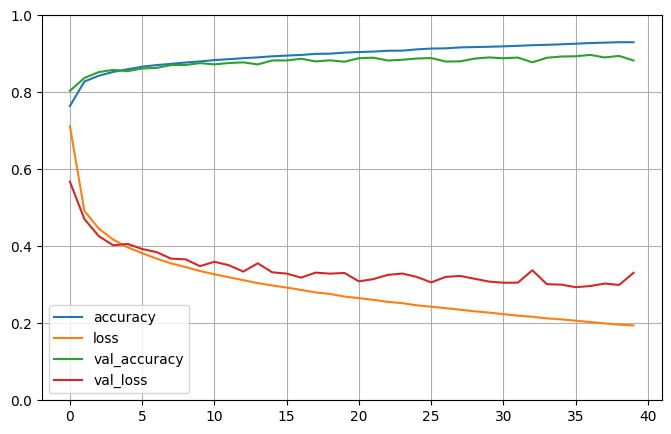

Test loss: 0.35831761360168457
Test accuracy: 0.8761000037193298


In [39]:
model.set_weights(initial_weights) # reset the basic model's weights
history = model.fit(X_train, y_train, epochs=40, # increase to 40
                    validation_data=(X_valid, y_valid)) 

# plot
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# final score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

The model seems to still be slightly improving. Lets try adding an earlyStopping argument to find the most optimal value for epoch

In [44]:
model.set_weights(initial_weights) # reset the model's weights

early_stopping = keras.callbacks.EarlyStopping(patience= 7, restore_best_weights= True) # patience at 7 because tendency to stop early
history = model.fit(X_train, y_train, epochs=50, # try 50
                    validation_data=(X_valid, y_valid),
                    callbacks = [early_stopping]) 

# final score
score = model.evaluate(X_test, y_test, verbose=0)
best_epoch = np.argmin(history.history['val_loss']) + 1
print('epochs used:', best_epoch)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6843 - loss: 0.9747 - val_accuracy: 0.8125 - val_loss: 0.5364
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8244 - loss: 0.5078 - val_accuracy: 0.8312 - val_loss: 0.4827
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8415 - loss: 0.4480 - val_accuracy: 0.8402 - val_loss: 0.4578
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8527 - loss: 0.4199 - val_accuracy: 0.8450 - val_loss: 0.4250
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8596 - loss: 0.3996 - val_accuracy: 0.8668 - val_loss: 0.3876
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8655 - loss: 0.3788 - val_accuracy: 0.8645 - val_loss: 0.3817
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8721 - loss: 0.3660 - val_accuracy: 0.8662 - val_loss: 0.3735
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8773 - loss: 0.3525 - 

-------------------------------------------------------------
We found that the model increased with the following changes:
- adding an additional layer: <br> model_im.add(keras.layers.Dense(200, activation="relu"))
- adding a dropout layer: <br> model_im.add(keras.layers.Dropout(0.5))
- changing the activation function: <br> model_im.add(keras.layers.LeakyReLU(alpha = 0.1))
- manually adding a learning rate of 0.01: <br> learning_rate = 0.01 <br>
    model_im.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate = learning_rate), metrics=["accuracy"])
- adding an earlyStopping argument: <br> early_stopping = keras.callbacks.EarlyStopping(patience= 7,       restore_best_weights= True) <br>
    history = model.fit(X_train, y_train, epochs=50, # try 50
                        validation_data=(X_valid, y_valid),
                        callbacks = [early_stopping]) 


Lets try to combine them


In [64]:
model_all = keras.models.Sequential()
model_all.add(keras.layers.Flatten(input_shape = [28, 28]))

model_all.add(keras.layers.Dense(300))
model_all.add(keras.layers.LeakyReLU(alpha = 0.1))
model_all.add(keras.layers.Dropout(0.5))

model_all.add(keras.layers.Dense(200))
model_all.add(keras.layers.LeakyReLU(alpha = 0.1))
model_all.add(keras.layers.Dropout(0.5))

model_all.add(keras.layers.Dense(100))
model_all.add(keras.layers.LeakyReLU(alpha = 0.1))
model_all.add(keras.layers.Dropout(0.5))

model_all.add(keras.layers.Dense(10, activation="softmax"))

model_all.summary()

C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,810 (1.21 MB)

 Trainable params: 316,810 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
learning_rate = 0.01
model_all.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate = learning_rate), metrics=["accuracy"])

early_stopping = keras.callbacks.EarlyStopping(patience= 7, restore_best_weights= True) # patience at 7 because tendency to stop early
history = model_all.fit(X_train, y_train, epochs=50, # try 50
                    validation_data=(X_valid, y_valid),
                    callbacks = [early_stopping]) 

# final score
score_all = model.evaluate(X_test, y_test, verbose=0)
best_epoch = np.argmin(history.history['val_loss']) + 1
print('epochs used:', best_epoch)
print('Test loss:', score_all[0])
print('Test accuracy:', score_all[1])

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4197 - loss: 1.6036 - val_accuracy: 0.7630 - val_loss: 0.6790
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7012 - loss: 0.8157 - val_accuracy: 0.8012 - val_loss: 0.5554
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7548 - loss: 0.6844 - val_accuracy: 0.8248 - val_loss: 0.4952
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7825 - loss: 0.6142 - val_accuracy: 0.8382 - val_loss: 0.4583
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7985 - loss: 0.5739 - val_accuracy: 0.8387 - val_loss: 0.4416
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8139 - loss: 0.5393 - val_accuracy: 0.8540 - val_loss: 0.4179
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8207 - loss: 0.5164 - val_accuracy: 0.8492 - val_loss: 0.4167
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8216 - loss: 0.5098 - 

This is better than the basic model which had a test loss of 0.3585... and a test accuracy of 0.8741...!